In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rc("font", family="Times New Roman")

In [2]:
df = pd.read_excel(
    "/Users/gavin/FP_Printing_Modeling/printing/composites/roller_printer/composite_print_phi_nondim_doe.xlsx",
    header=2,
).dropna()

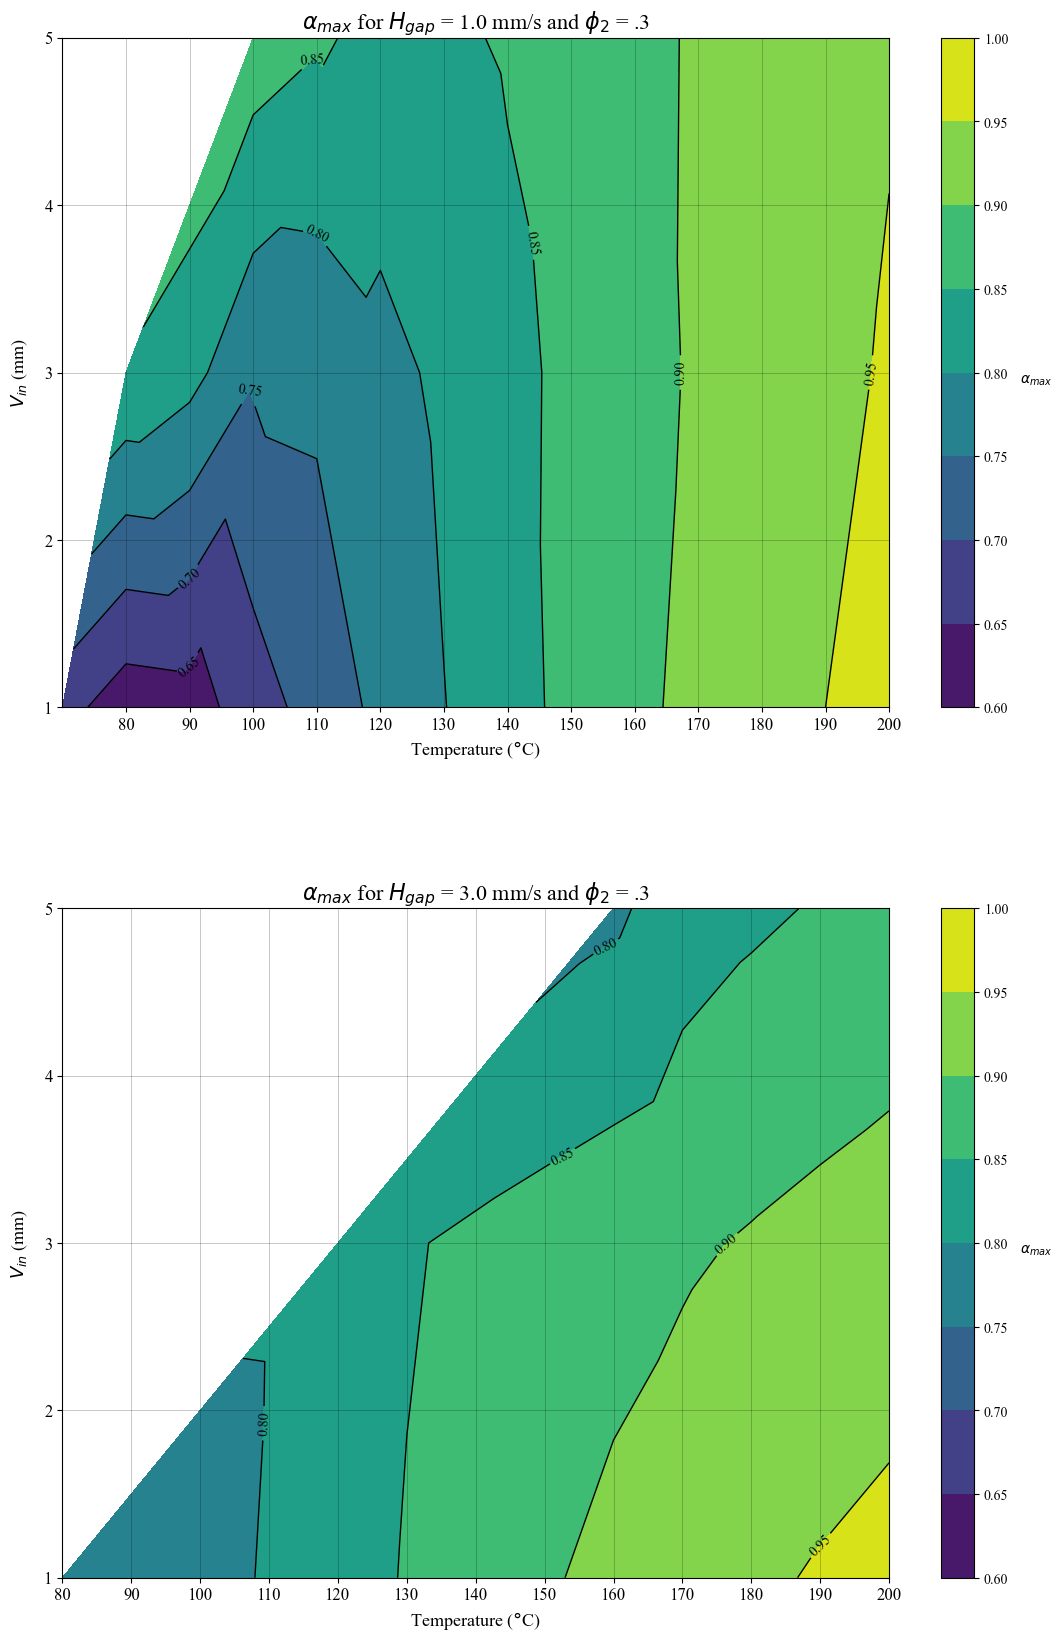

In [6]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13.33333, 20))
plt.subplots_adjust(hspace=0.3)
for i, hgap in enumerate(np.unique(df["H_gap [mm]"].values)):

    curr = df[df["H_gap [mm]"] == hgap]
    vin = curr["V_in [mm/s]"].values
    temp = curr["T_R [degC]"].values
    alpha = curr["alpha_max_midline"].values

    csf = axes[i].tricontourf(
        temp,
        vin,
        alpha,
        levels=[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
    )

    cs = axes[i].tricontour(
        temp,
        vin,
        alpha,
        levels=[0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1],
        linewidths=1,
        colors="black",
    )

    axes[i].clabel(cs, cs.levels, colors="black")
    axes[i].set_title(
        r"$\alpha_{max}$ for $H_{gap}$ = " + str(hgap) + " mm and $\phi_{2}$ = .3",
        fontsize=16,
    )

    cb = fig.colorbar(csf)
    cb.set_label(r"$\alpha_{max}$", loc="center", rotation=0, labelpad=20)

    axes[i].set_xlabel("Temperature ($\degree$C)", fontsize=13)
    axes[i].set_ylabel("$V_{in}$ (mm)", fontsize=13, labelpad=10)

    xticks = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
    yticks = [1, 2, 3, 4, 5]
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels(xticks, fontsize=12)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(yticks, fontsize=12)
    axes[i].grid(True, color="black", lw=0.5, alpha=0.30)

plt.savefig("alpha_temp_vin_contour.png", dpi=300, bbox_inches="tight")

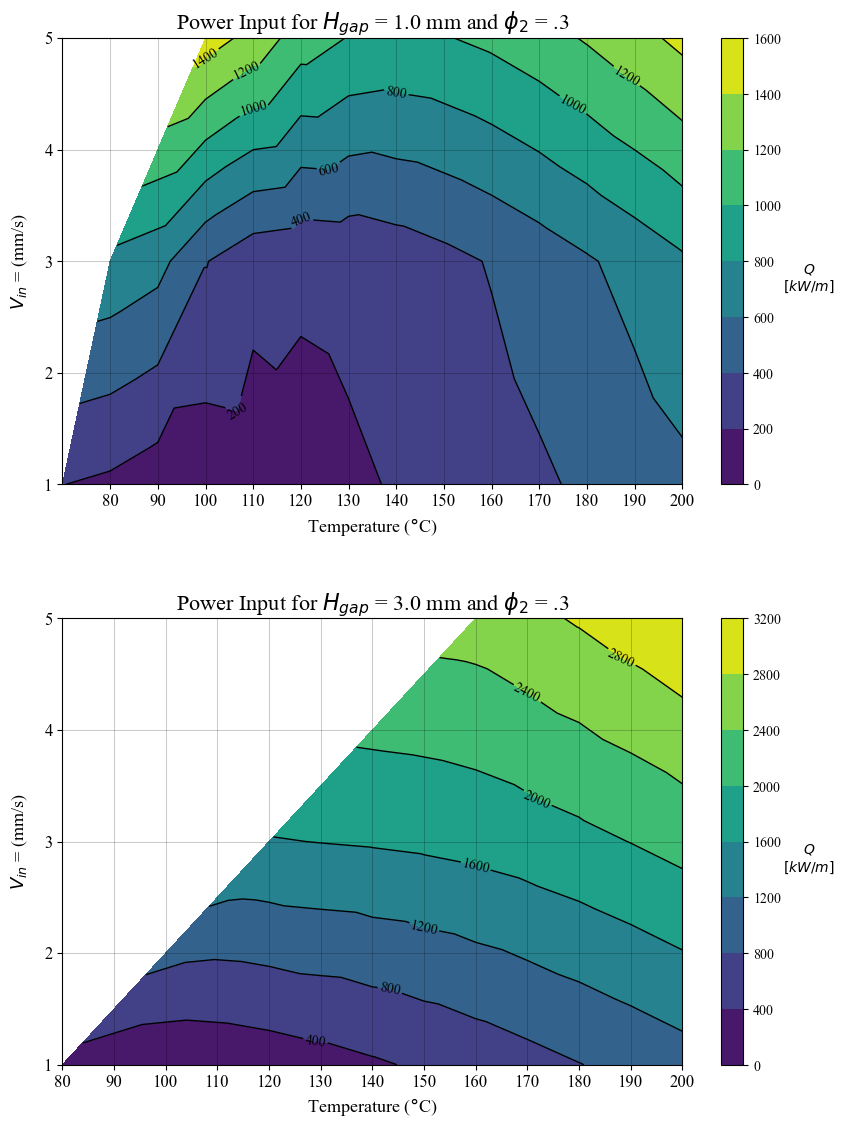

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 13.333333))
plt.subplots_adjust(hspace=0.3)

for i, hgap in enumerate(np.unique(df["H_gap [mm]"].values)):

    curr = df[df["H_gap [mm]"] == hgap]
    vin = curr["V_in [mm/s]"].values
    temp = curr["T_R [degC]"].values
    Q = -curr["Q [W/m]"].values / 1000

    csf = axes[i].tricontourf(
        temp,
        vin,
        Q,
    )

    cs = axes[i].tricontour(
        temp,
        vin,
        Q,
        linewidths=1,
        colors="black",
    )

    axes[i].clabel(cs, cs.levels, colors="black")
    axes[i].set_title(
        r"Power Input for $H_{gap}$ = " + str(hgap) + " mm and $\phi_{2}$ = .3",
        fontsize=16,
    )

    cb = fig.colorbar(csf)
    cb.set_label("$Q$" + "\n" + "$[kW/m]$", loc="center", rotation=0, labelpad=20)

    axes[i].set_xlabel("Temperature ($\degree$C)", fontsize=13)
    axes[i].set_ylabel("$V_{in}$ = (mm/s)", fontsize=13, labelpad=10)

    xticks = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
    yticks = [1, 2, 3, 4, 5]
    axes[i].set_xticks(xticks)
    axes[i].set_xticklabels(xticks, fontsize=12)
    axes[i].set_yticks(yticks)
    axes[i].set_yticklabels(yticks, fontsize=12)
    axes[i].grid(True, color="black", lw=0.5, alpha=0.30)

plt.savefig("Q_temp_vin_contour.png", dpi=300, bbox_inches="tight")

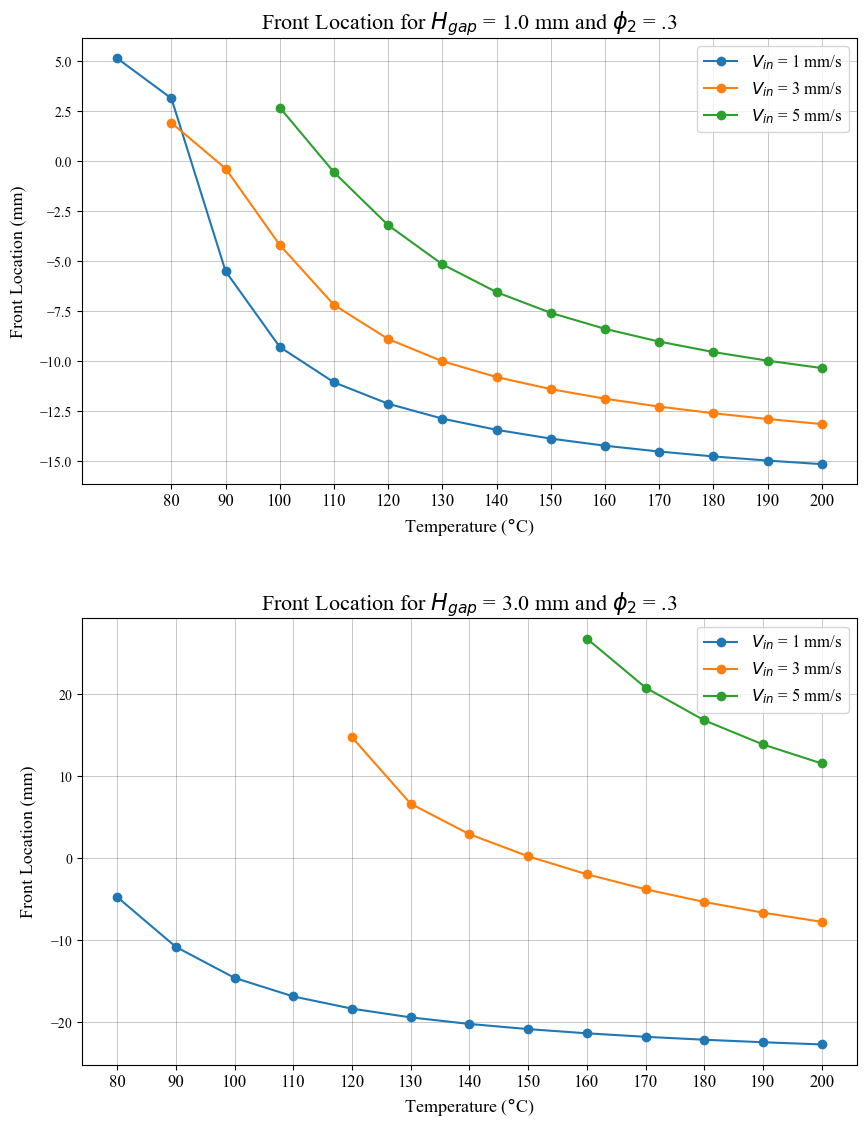

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 13.3333))
plt.subplots_adjust(hspace=0.3)

for i, hgap in enumerate(np.unique(df["H_gap [mm]"].values)):

    for vin in [1, 3, 5]:

        lr_data = df[(np.isclose(df["H_gap [mm]"], hgap)) & (df["V_in [mm/s]"] == vin)]
        lf = lr_data["L_front [mm]"].values
        temp = lr_data["T_R [degC]"].values

        axes[i].plot(temp, lf, marker="o", label=r"$V_{in}$ = " + str(vin) + " mm/s")
        axes[i].set_xlabel("Temperature ($\degree$C)", fontsize=13)
        axes[i].set_ylabel("Front Location (mm)", fontsize=13, labelpad=10)
        xticks = [80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
        axes[i].set_xticks(xticks)
        axes[i].set_xticklabels(xticks, fontsize=12)
        
        # yticks = [-6, -4, -2, 0, 2, 4, 6]
        # axes[i].set_yticks(yticks)
        # axes[i].set_yticklabels(yticks, fontsize=12)
        axes[i].grid(True, color="black", lw=0.5, alpha=0.30)

        axes[i].set_title(
            r"Front Location for $H_{gap}$ = " + str(hgap) + " mm and $\phi_{2}$ = .3",
            fontsize=16,
        )

    axes[i].legend(fontsize=12)

plt.savefig("Lf_v_temp_hgap.png", dpi=300, bbox_inches="tight")